## How to Plot Histograms and Fit a Gaussian (basics) 
@PauloCaldas 2019, May // https://github.com/paulocaldas/How-to-Python

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit #module to fit curves

%matplotlib inline

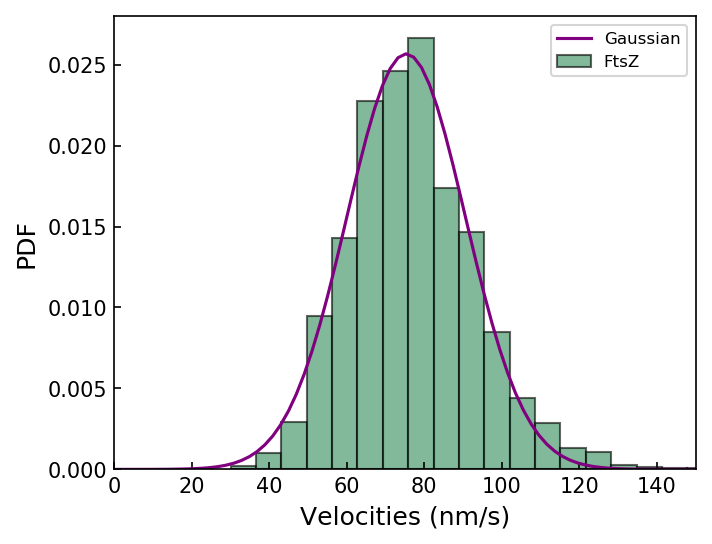

In [9]:
# import data to plot
mydata = pd.read_csv('data_examples/FtsZ Alone 2018.01.16 ExpI_growth_tracks.csv') #read data as a table

data_to_plot = mydata['TRACK_MEAN_SPEED']
data_to_plot = data_to_plot * 1000 # to nanometers

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 20, edgecolor='black', color = 'seagreen', density = True, alpha=0.6, label = 'FtsZ')

plt.xlim([0,150])
plt.xlabel('Velocities (nm/s)', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
#plt.title("TrackMate Info", fontsize = 12)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-50,150,100)

# fit the data and plot the result
param, cov = curve_fit(gaussian, bins,counts, p0=(10,10,10))
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussian")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

plt.legend(loc = 0, fontsize = 8)

#fancy way of printing info
"mean = {0:4.1f} nm/s with stdev = {1:4.1f}".format(param[1],-param[2])

#save figure
plt.savefig('plot_examples/histogram_example.png', transparent=False, bbox_inches = 'tight')